In [ ]:
# Cellule pour installer les packages
!pip install statsmodels pandas numpy matplotlib seaborn

In [1]:
# Cellule 1 - Imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from statsmodels.genmod.families.family import Tweedie
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Affichage des colonnes du fichier target
print("Colonnes du fichier target (train_output_DzPxaPY.csv):")
train_target = pd.read_csv('data/train_output_DzPxaPY.csv')
print("\nColonnes:", train_target.columns.tolist())
print("\nAperçu des premières lignes:")
print(train_target.head())

In [ ]:
# Cellule 2 - Chargement des données
def load_data():
    print("Chargement des données...")
    
    # Chargement des fichiers
    train_df = pd.read_csv('data/train_output_DzPxaPY.csv')
    test_df = pd.read_csv('data/test_input_5qJzHrr.csv')
    submission_example = pd.read_csv('data/submission_csv_file_random_example_3fbDtrr (1).csv')
    
    print(f"Dimensions du train : {train_df.shape}")
    print(f"Dimensions du test : {test_df.shape}")
    
    return train_df, test_df, submission_example

# Chargement des données
train_df, test_df, submission_example = load_data()

In [ ]:
# Cellule améliorée pour charger les données
def load_data():
    print("Chargement des données...")
    
    # Chargement avec gestion des types
    train_df = pd.read_csv('data/train_output_DzPxaPY.csv', low_memory=False)
    test_df = pd.read_csv('data/test_input_5qJzHrr.csv', low_memory=False)
    
    # Les colonnes attendues dans le train
    expected_train_cols = ['ID', 'FREQ', 'CM', 'CHARGE', 'ANNEE_ASSURANCE']
    
    # Vérification des colonnes essentielles
    missing_train_cols = set(expected_train_cols) - set(train_df.columns)
    if missing_train_cols:
        raise ValueError(f"Colonnes manquantes dans train: {missing_train_cols}")
    
    # Vérification de la cohérence des colonnes features
    train_features = train_df.drop(['FREQ', 'CM', 'CHARGE'], axis=1).columns
    test_features = test_df.drop(['ID'], axis=1).columns
    
    if not set(train_features) == set(test_features):
        print("ATTENTION: Les features ne sont pas identiques entre train et test!")
        print("Features uniquement dans train:", set(train_features) - set(test_features))
        print("Features uniquement dans test:", set(test_features) - set(train_features))
    
    return train_df, test_df

# Rechargement des données avec la nouvelle fonction
train_df, test_df = load_data()

In [ ]:
# Cellule 2 - Chargement correct des données
def load_data():
    print("Chargement des données...")
    
    # Chargement des fichiers avec les bons noms
    train_features = pd.read_csv('data/train_input_Z61KlZo.csv')
    train_target = pd.read_csv('data/train_output_DzPxaPY.csv')
    test_df = pd.read_csv('data/test_input_5qJzHrr.csv')
    
    # Fusion des données train
    train_df = pd.merge(train_features, train_target, on='ID', how='inner')
    
    print(f"\nDimensions des données:")
    print(f"Train features initiales: {train_features.shape}")
    print(f"Train target: {train_target.shape}")
    print(f"Train après fusion: {train_df.shape}")
    print(f"Test: {test_df.shape}")
    
    # Vérification de la cohérence
    print("\nVérification de la cohérence des colonnes...")
    feature_cols = [col for col in test_df.columns if col != 'ID']
    missing_cols = [col for col in feature_cols if col not in train_df.columns]
    extra_cols = [col for col in train_df.columns if col not in test_df.columns and col not in ['FREQ', 'CM', 'CHARGE']]
    
    if missing_cols:
        print(f"\nColonnes manquantes dans train: {missing_cols}")
    if extra_cols:
        print(f"\nColonnes supplémentaires dans train: {extra_cols}")
        
    return train_df, test_df

# Exécution du chargement
train_df, test_df = load_data()

In [2]:
# Cellule améliorée pour le chargement des données
def load_data():
    print("Chargement des données...")
    
    # Chargement avec gestion des types mixtes
    train_features = pd.read_csv('data/train_input_Z61KlZo.csv', low_memory=False)
    train_target = pd.read_csv('data/train_output_DzPxaPY.csv')
    test_df = pd.read_csv('data/test_input_5qJzHrr.csv', low_memory=False)
    
    # Gestion de la colonne ANNEE_ASSURANCE avant fusion
    if 'ANNEE_ASSURANCE' in train_features.columns:
        train_features = train_features.drop('ANNEE_ASSURANCE', axis=1)
    
    # Fusion des données train
    train_df = pd.merge(train_features, train_target, on='ID', how='inner')
    
    print(f"\nDimensions des données:")
    print(f"Train features initiales: {train_features.shape}")
    print(f"Train target: {train_target.shape}")
    print(f"Train après fusion: {train_df.shape}")
    print(f"Test: {test_df.shape}")
    
    # Vérification des colonnes
    train_cols = set(train_df.columns) - {'FREQ', 'CM', 'CHARGE', 'ID'}
    test_cols = set(test_df.columns) - {'ID'}
    
    missing_cols = test_cols - train_cols
    extra_cols = train_cols - test_cols
    
    if missing_cols:
        print(f"\nColonnes manquantes dans train: {missing_cols}")
    if extra_cols:
        print(f"\nColonnes supplémentaires dans train: {extra_cols}")
    
    # Vérification des types de données
    print("\nTypes de données dans train:")
    print(train_df.dtypes.value_counts())
    
    return train_df, test_df

# Exécution du chargement corrigé
train_df, test_df = load_data()

# Vérification supplémentaire
def verify_data_quality(train_df, test_df):
    print("\n=== Vérification de la qualité des données ===")
    
    # Valeurs manquantes
    print("\nValeurs manquantes dans train:")
    missing_train = train_df.isnull().sum()
    print(missing_train[missing_train > 0])
    
    print("\nValeurs manquantes dans test:")
    missing_test = test_df.isnull().sum()
    print(missing_test[missing_test > 0])
    
    # Vérification des variables cibles
    print("\nStatistiques des variables cibles:")
    print(train_df[['FREQ', 'CM', 'CHARGE']].describe())
    
    return missing_train, missing_test

# Exécution de la vérification
missing_train, missing_test = verify_data_quality(train_df, test_df)

Chargement des données...

Dimensions des données:
Train features initiales: (383610, 373)
Train target: (383610, 5)
Train après fusion: (383610, 377)
Test: (95852, 374)

Types de données dans train:
object     280
int64       58
float64     39
dtype: int64

=== Vérification de la qualité des données ===

Valeurs manquantes dans train:
CARACT1              4633
CARACT2            368284
CARACT3            368284
DUREE_REQANEUF      26573
TYPBAT1            353336
                    ...  
RR_VOR_MM_A        217712
RR_VOR_MMAX_A      217712
RRAB_VOR_MM_A      217712
RRAB_VOR_MMAX_A    217712
ESPINSEE           151542
Length: 278, dtype: int64

Valeurs manquantes dans test:
CARACT1             1148
CARACT2            91998
CARACT3            91998
DUREE_REQANEUF      6602
TYPBAT1            88408
                   ...  
RR_VOR_MM_A        54577
RR_VOR_MMAX_A      54577
RRAB_VOR_MM_A      54577
RRAB_VOR_MMAX_A    54577
ESPINSEE           38026
Length: 276, dtype: int64

Statistiques des 

In [5]:
def verify_charge_calculation(df):
    print("=== Vérification du calcul de CHARGE ===")
    
    # Calculer CHARGE théorique
    df['CHARGE_calc'] = df['FREQ'] * df['CM'] * df['ANNEE_ASSURANCE']
    
    # Comparer avec CHARGE réelle
    df['diff_pct'] = abs(df['CHARGE_calc'] - df['CHARGE']) / df['CHARGE'] * 100
    
    print("\nStatistiques des différences (en %):")
    print(df['diff_pct'].describe())
    
    # Identifier les cas problématiques
    problematic = df[df['diff_pct'] > 1]  # différence > 1%
    if len(problematic) > 0:
        print(f"\nNombre de cas problématiques: {len(problematic)}")
        print("\nExemples de cas problématiques:")
        print(problematic[['FREQ', 'CM', 'ANNEE_ASSURANCE', 'CHARGE', 'CHARGE_calc', 'diff_pct']].head())
    
    return df

# Vérifier sur le fichier de soumission
submission = pd.read_csv('data/submission_csv_file_random_example_3fbDtrr (1).csv')
submission_verified = verify_charge_calculation(submission)

=== Vérification du calcul de CHARGE ===

Statistiques des différences (en %):
count    9.585200e+04
mean     6.283407e+03
std      6.129061e+05
min      2.665831e-03
25%      8.539911e+01
50%      3.813092e+02
75%      1.272855e+03
max      1.854085e+08
Name: diff_pct, dtype: float64

Nombre de cas problématiques: 95646

Exemples de cas problématiques:
        FREQ             CM  ANNEE_ASSURANCE         CHARGE   CHARGE_calc  \
0  10.313189  460921.401776         0.813699    9580.637697  3.867973e+06   
1   0.850423  297576.004192         1.000000  271039.028431  2.530654e+05   
2  10.579981  183213.330341         0.586301  495210.849896  1.136483e+06   
3  15.956812   28251.893252         1.000000  223914.027490  4.508101e+05   
4  13.424283  366027.448769         0.753425   41235.028626  3.702070e+06   

       diff_pct  
0  40272.813161  
1      6.631382  
2    129.494718  
3    101.331798  
4   8877.972592  


Corrélation entre FREQ et CM:
          FREQ        CM
FREQ  1.000000  0.139367
CM    0.139367  1.000000


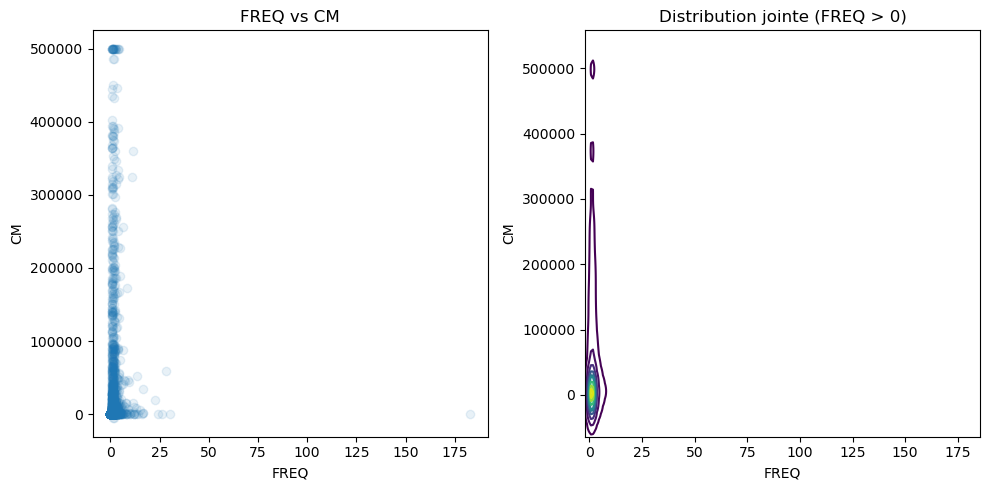

In [3]:
# Vérifions leur indépendance
def analyze_correlation():
    # Calcul de la corrélation
    correlation = train_df[['FREQ', 'CM']].corr()
    print("Corrélation entre FREQ et CM:")
    print(correlation)
    
    # Visualisation
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.scatter(train_df['FREQ'], train_df['CM'], alpha=0.1)
    plt.xlabel('FREQ')
    plt.ylabel('CM')
    plt.title('FREQ vs CM')
    
    # Distribution jointe
    plt.subplot(122)
    sns.kdeplot(data=train_df[train_df['FREQ'] > 0], 
                x='FREQ', y='CM', 
                cmap='viridis')
    plt.title('Distribution jointe (FREQ > 0)')
    
    plt.tight_layout()
    plt.show()

analyze_correlation()

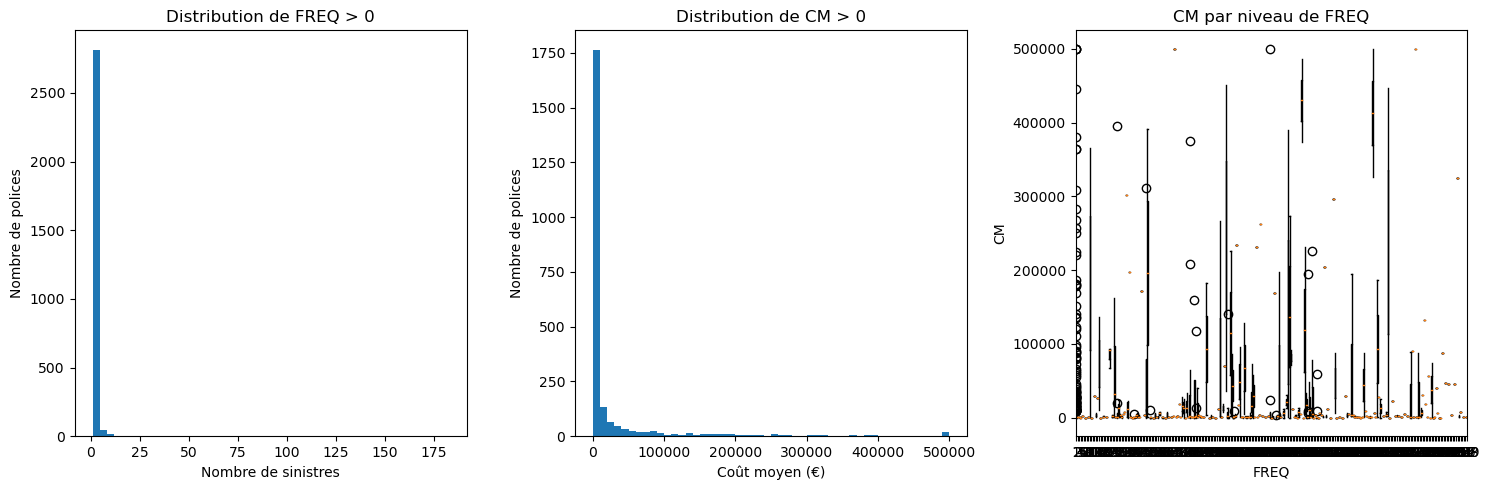


Statistiques pour les sinistres non-nuls:

FREQ > 0:
count    2894.000000
mean        1.650533
std         3.769215
min         0.968170
25%         1.000000
50%         1.001374
75%         1.553191
max       182.499998
Name: FREQ, dtype: float64

CM > 0:
count      2352.000000
mean      29775.080531
std       80268.512708
min           1.000000
25%         489.187500
50%        1786.600000
75%       10005.050000
max      500000.000000
Name: CM, dtype: float64


In [4]:
def detailed_analysis():
    plt.figure(figsize=(15, 5))
    
    # Distribution de FREQ
    plt.subplot(131)
    plt.hist(train_df['FREQ'][train_df['FREQ'] > 0], bins=50)
    plt.title('Distribution de FREQ > 0')
    plt.xlabel('Nombre de sinistres')
    plt.ylabel('Nombre de polices')
    
    # Distribution de CM
    plt.subplot(132)
    plt.hist(train_df['CM'][train_df['CM'] > 0], bins=50)
    plt.title('Distribution de CM > 0')
    plt.xlabel('Coût moyen (€)')
    plt.ylabel('Nombre de polices')
    
    # Boxplot des CM par FREQ
    plt.subplot(133)
    train_df_sample = train_df[train_df['FREQ'] > 0].sample(min(1000, len(train_df[train_df['FREQ'] > 0])))
    plt.boxplot([group['CM'].values for name, group in train_df_sample.groupby('FREQ')])
    plt.title('CM par niveau de FREQ')
    plt.xlabel('FREQ')
    plt.ylabel('CM')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques descriptives
    print("\nStatistiques pour les sinistres non-nuls:")
    print("\nFREQ > 0:")
    print(train_df[train_df['FREQ'] > 0]['FREQ'].describe())
    print("\nCM > 0:")
    print(train_df[train_df['CM'] > 0]['CM'].describe())

detailed_analysis()

In [ ]:
# Analysons FREQ plus en détail
def analyze_freq():
    print("Analyse de la variable FREQ")
    print("\nDistribution globale:")
    print(train_df['FREQ'].describe())
    
    print("\nRépartition des polices:")
    print("Nombre de polices sans sinistre:", (train_df['FREQ'] == 0).sum())
    print("Nombre de polices avec sinistres:", (train_df['FREQ'] > 0).sum())
    
    # Distribution des FREQ non nulles
    freq_counts = train_df[train_df['FREQ'] > 0]['FREQ'].value_counts().sort_index()
    print("\nDétail des fréquences non nulles:")
    print(freq_counts.head(10))
    
    # Visualisation
    plt.figure(figsize=(15, 5))
    
    # Distribution avec zoom sur les valeurs non nulles
    plt.subplot(121)
    plt.hist(train_df[train_df['FREQ'] > 0]['FREQ'], bins=30)
    plt.title('Distribution des FREQ > 0')
    plt.xlabel('Nombre de sinistres par an')
    plt.ylabel('Nombre de polices')
    
    # Relation avec ANNEE_ASSURANCE
    plt.subplot(122)
    plt.scatter(train_df['ANNEE_ASSURANCE'], train_df['FREQ'], alpha=0.1)
    plt.title('FREQ vs ANNEE_ASSURANCE')
    plt.xlabel('Durée d\'exposition (années)')
    plt.ylabel('Nombre de sinistres par an')
    
    plt.tight_layout()
    plt.show()

analyze_freq()

In [1]:
#Suggestions pour la suite :
def prepare_features(train_df, test_df):
    # Colonnes à traiter différemment
    numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = train_df.select_dtypes(include=['object']).columns
    
    # Gestion des valeurs manquantes
    for col in numeric_cols:
        if train_df[col].isnull().sum() > 0:
            # Remplacement par la médiane pour les numériques
            median_value = train_df[col].median()
            train_df[col] = train_df[col].fillna(median_value)
            test_df[col] = test_df[col].fillna(median_value)
    
    for col in categorical_cols:
        if train_df[col].isnull().sum() > 0:
            # Nouvelle catégorie pour les manquants
            train_df[col] = train_df[col].fillna('MISSING')
            test_df[col] = test_df[col].fillna('MISSING')
    
    # Encodage des variables catégorielles
    for col in categorical_cols:
        # One-hot encoding avec gestion des nouvelles catégories
        dummies_train = pd.get_dummies(train_df[col], prefix=col)
        dummies_test = pd.get_dummies(test_df[col], prefix=col)
        
        # Alignement des colonnes
        all_columns = set(dummies_train.columns) | set(dummies_test.columns)
        for column in all_columns:
            if column not in dummies_train:
                dummies_train[column] = 0
            if column not in dummies_test:
                dummies_test[column] = 0
                
        train_df = pd.concat([train_df, dummies_train], axis=1)
        test_df = pd.concat([test_df, dummies_test], axis=1)
        train_df = train_df.drop(col, axis=1)
        test_df = test_df.drop(col, axis=1)
    
    return train_df, test_df

# Préparation des données
X_train, X_test = prepare_features(train_df.copy(), test_df.copy())

In [ ]:
# Cellule 3 - Analyse exploratoire rapide
def quick_eda(train_df):
    print("=== Analyse exploratoire des données ===")
    
    # Variables cibles
    print("\nStatistiques des variables cibles:")
    target_stats = train_df[['FREQ', 'CM', 'CHARGE']].describe()
    print(target_stats)
    
    # Types de données
    print("\nTypes de données:")
    print(train_df.dtypes.value_counts())
    
    # Valeurs manquantes
    missing = train_df.isnull().sum()
    if missing.any():
        print("\nColonnes avec valeurs manquantes:")
        print(missing[missing > 0])
    
    # Visualisation des distributions
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.hist(train_df['FREQ'], bins=50)
    plt.title('Distribution FREQ')
    
    plt.subplot(132)
    plt.hist(train_df['CM'], bins=50)
    plt.title('Distribution CM')
    
    plt.subplot(133)
    plt.hist(train_df['CHARGE'], bins=50)
    plt.title('Distribution CHARGE')
    
    plt.tight_layout()
    plt.show()
    
    return target_stats

# Exécution de l'EDA
stats = quick_eda(train_df)

In [ ]:
# Cellule pour analyser les différences entre train et test
def analyze_datasets():
    print("=== Analyse des datasets ===")
    
    # Dimensions
    print(f"\nTrain shape: {train_df.shape}")
    print(f"Test shape: {test_df.shape}")
    
    # Colonnes dans chaque dataset
    print("\nColonnes dans train:", train_df.columns.tolist())
    print("\nColonnes dans test:", test_df.columns.tolist())
    
    # Différences entre les colonnes
    train_cols = set(train_df.columns)
    test_cols = set(test_df.columns)
    
    print("\nColonnes uniquement dans train:", train_cols - test_cols)
    print("\nColonnes uniquement dans test:", test_cols - train_cols)
    
    # Warning sur les types mixtes
    print("\nTypes de données dans test:")
    print(test_df.dtypes[test_df.dtypes == 'object'])

# Exécution de l'analyse
analyze_datasets()

In [ ]:
# Cellule 3 - Définition des groupes de variables
# Ces groupes nous aideront à organiser et analyser nos données
WEATHER_VARS = {
    'temperature': [col for col in train_df.columns if 'NBJT' in col or 'TM' in col or 'TN' in col or 'TX' in col],
    'wind': [col for col in train_df.columns if 'FF' in col or 'FX' in col],
    'rain': [col for col in train_df.columns if 'RR' in col]
}

BUILDING_VARS = {
    'surface': [f'SURFACE{i}' for i in range(1, 22)],
    'buildings': [f'NBBAT{i}' for i in range(1, 15)],
    'characteristics': [f'CARACT{i}' for i in range(1, 6)]
}

RISK_VARS = {
    'risk_indicators': [f'RISK{i}' for i in range(1, 14)],
    'capital': [f'KAPITAL{i}' for i in range(1, 44)]
}

GEOGRAPHIC_VARS = {
    'distances': [col for col in train_df.columns if 'distance_' in col],
    'proportions': [col for col in train_df.columns if 'proportion_' in col]
}

In [ ]:
# Cellule d'analyse de la structure des données
def analyze_data_structure(train_df, test_df):
    print("=== Analyse de la structure des données ===\n")
    
    # Dimensions des datasets
    print(f"Train shape: {train_df.shape}")
    print(f"Test shape: {test_df.shape}\n")
    
    # Types de données
    print("=== Types de données dans le train ===")
    print(train_df.dtypes.value_counts())
    print("\n=== Exemples de colonnes par type ===")
    for dtype in train_df.dtypes.unique():
        print(f"\n{dtype}:")
        print(train_df.select_dtypes(include=[dtype]).columns[:5].tolist())
    
    # Valeurs manquantes
    print("\n=== Analyse des valeurs manquantes ===")
    missing_train = train_df.isnull().sum()
    missing_test = test_df.isnull().sum()
    
    print("\nColonnes avec valeurs manquantes dans train:")
    print(missing_train[missing_train > 0])
    
    print("\nColonnes avec valeurs manquantes dans test:")
    print(missing_test[missing_test > 0])
    
    # Variables catégorielles
    categorical_cols = train_df.select_dtypes(include=['object']).columns
    print("\n=== Variables catégorielles ===")
    for col in categorical_cols:
        n_unique = train_df[col].nunique()
        print(f"{col}: {n_unique} valeurs uniques")
        if n_unique < 10:  # Afficher les valeurs si peu nombreuses
            print(train_df[col].value_counts())
        print()

# Exécution de l'analyse
train_df, test_df, submission_example = load_data()
analyze_data_structure(train_df, test_df)

In [ ]:
# Cellule 4 - Analyse exploratoire des données (EDA)
def explore_data(df):
    print("Analyse exploratoire des données...")
    
    # Statistiques descriptives des variables cibles
    print("\nStatistiques des variables cibles:")
    print(df[['FREQ', 'CM', 'CHARGE']].describe())
    
    # Distribution des variables cibles
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    df['FREQ'].hist(ax=axes[0], bins=50)
    axes[0].set_title('Distribution de la Fréquence')
    
    df['CM'].hist(ax=axes[1], bins=50)
    axes[1].set_title('Distribution du Coût Moyen')
    
    df['CHARGE'].hist(ax=axes[2], bins=50)
    axes[2].set_title('Distribution de la Charge')
    
    plt.tight_layout()
    plt.show()
    
    # Analyse des corrélations
    print("\nAnalyse des corrélations avec les variables cibles:")
    correlations = {}
    for var_group, vars_list in {**WEATHER_VARS, **BUILDING_VARS, **RISK_VARS, **GEOGRAPHIC_VARS}.items():
        corr_freq = df[vars_list].corrwith(df['FREQ']).abs().mean()
        corr_cm = df[vars_list].corrwith(df['CM']).abs().mean()
        correlations[var_group] = {'FREQ': corr_freq, 'CM': corr_cm}
    
    correlation_df = pd.DataFrame(correlations).T
    print(correlation_df)
    
    return correlation_df

# Exécution de l'EDA
correlation_analysis = explore_data(train_df)

In [ ]:
# Cellule 5 - Feature Engineering
def enhanced_feature_engineering(df):
    print("Application du feature engineering...")
    
    # Agrégations des surfaces et bâtiments
    df['total_surface'] = df[BUILDING_VARS['surface']].sum(axis=1)
    df['total_buildings'] = df[BUILDING_VARS['buildings']].sum(axis=1)
    df['surface_per_building'] = df['total_surface'] / (df['total_buildings'] + 1)
    
    # Score de risque
    df['risk_score'] = df[RISK_VARS['risk_indicators']].sum(axis=1)
    
    # Variables météorologiques
    df['extreme_temp_days'] = df[['NBJTX35_MM_A', 'NBJTN5_MM_A']].sum(axis=1)
    df['strong_wind_days'] = df[['NBJFF28_MM_A', 'NBJFF16_MM_A']].sum(axis=1)
    
    # Accessibilité des secours
    df['emergency_access_score'] = df['nb_casernes'] * (1 / (df['distance_121'] + 1))
    
    return df

In [ ]:
# Cellule 6 - Préparation des données
def prepare_data(train_df, test_df):
    print("Préparation des données...")
    
    # Séparation des features et targets
    y_freq = train_df['FREQ']
    y_cost = train_df['CM']
    X_train = train_df.drop(['FREQ', 'CM', 'CHARGE', 'ID'], axis=1)
    X_test = test_df.drop(['ID'], axis=1)
    
    # Feature engineering
    X_train = enhanced_feature_engineering(X_train)
    X_test = enhanced_feature_engineering(X_test)
    
    # Encodage des variables catégorielles
    categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
    
    # Création d'un DataFrame combiné pour l'encodage
    combined_data = pd.concat([X_train, X_test], axis=0)
    encoded_data = pd.get_dummies(combined_data, columns=categorical_cols)
    
    # Séparation des données encodées
    X_train_encoded = encoded_data[:len(X_train)]
    X_test_encoded = encoded_data[len(X_train):]
    
    return X_train_encoded, X_test_encoded, y_freq, y_cost

# Préparation des données
X_train, X_test, y_freq, y_cost = prepare_data(train_df, test_df)

In [ ]:
# Cellule 7 - Entraînement des modèles
def train_models(X_train, y_freq, y_cost):
    print("Entraînement des modèles...")
    
    # Modèle de fréquence
    print("Entraînement du modèle de fréquence...")
    freq_model = GLM(
        y_freq,
        X_train,
        family=Poisson(link='log')
    ).fit()
    
    # Modèle de coût
    print("Entraînement du modèle de coût...")
    cost_model = GLM(
        y_cost,
        X_train,
        family=Tweedie(link='log', var_power=1.5)
    ).fit()
    
    return freq_model, cost_model

# Entraînement des modèles
freq_model, cost_model = train_models(X_train, y_freq, y_cost)

In [ ]:
# Cellule 8 - Génération des prédictions et évaluation
def generate_submission(freq_model, cost_model, X_test, test_df, submission_example):
    print("Génération des prédictions...")
    
    # Prédictions
    pred_freq = freq_model.predict(X_test)
    pred_cost = cost_model.predict(X_test)
    
    # Calcul de la charge prédite
    pred_charge = pred_freq * pred_cost * test_df['ANNEE_ASSURANCE']
    
    # Création du fichier de soumission
    submission = pd.DataFrame({
        'ID': test_df['ID'],
        'CHARGE': pred_charge
    })
    
    # Vérification du format
    assert all(submission.columns == submission_example.columns), "Format de colonnes incorrect"
    
    # Statistiques des prédictions
    print("\nStatistiques des prédictions:")
    print(submission['CHARGE'].describe())
    
    # Visualisation de la distribution des prédictions
    plt.figure(figsize=(10, 6))
    plt.hist(submission['CHARGE'], bins=50)
    plt.title('Distribution des charges prédites')
    plt.xlabel('Charge')
    plt.ylabel('Fréquence')
    plt.show()
    
    return submission

# Génération de la soumission
submission = generate_submission(freq_model, cost_model, X_test, test_df, submission_example)
submission.to_csv('submission.csv', index=False)
print("Fichier de soumission généré avec succès!")

In [ ]:
# Cellule de validation du format de soumission
def validate_submission(submission):
    print("=== Validation du format de soumission ===")
    
    # Vérification des colonnes
    print("\nColonnes présentes:", submission.columns.tolist())
    assert set(submission.columns) == {'ID', 'CHARGE'}, "Format de colonnes incorrect"
    
    # Vérification des types de données
    print("\nTypes de données:")
    print(submission.dtypes)
    
    # Vérification des valeurs manquantes
    missing = submission.isnull().sum()
    print("\nValeurs manquantes:")
    print(missing)
    assert missing.sum() == 0, "Présence de valeurs manquantes"
    
    # Vérification des valeurs négatives dans CHARGE
    neg_charges = (submission['CHARGE'] < 0).sum()
    print(f"\nNombre de charges négatives: {neg_charges}")
    assert neg_charges == 0, "Présence de charges négatives"
    
    # Statistiques descriptives
    print("\nStatistiques des charges prédites:")
    print(submission['CHARGE'].describe())
    
    print("\nFormat de soumission validé avec succès!")
    return True

# Utilisation
submission = generate_submission(freq_model, cost_model, X_test, test_df)
validate_submission(submission)

# Sauvegarde si validation réussie
submission.to_csv('submission.csv', index=False)